In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
test = pd.read_csv(r"C:\Users\srish\OneDrive\Desktop\Internships\Techno Hacks\test.csv")
train = pd.read_csv(r"C:\Users\srish\OneDrive\Desktop\Internships\Techno Hacks\train.csv")

In [28]:
pd.set_option('display.max_columns',None)

In [29]:
test.shape

(418, 11)

In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking and cleaning null values in data 

In [31]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [33]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
test['Age'].value_counts()

79

In [35]:
test['Age'].fillna(test['Age'].mean(), inplace = True)

In [36]:
# Dropping Cabin becuse it has too much null values 
test.drop('Cabin', axis = 1, inplace = True)

In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [34]:
test['Age'].mean()

30.272590361445783

Checking for outlies 

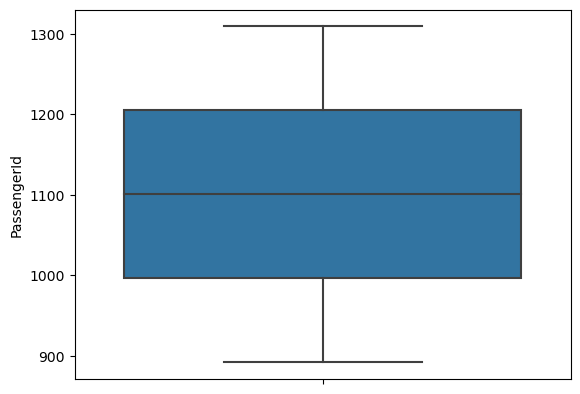

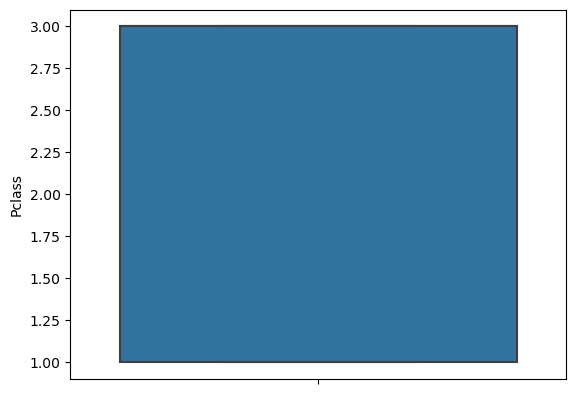

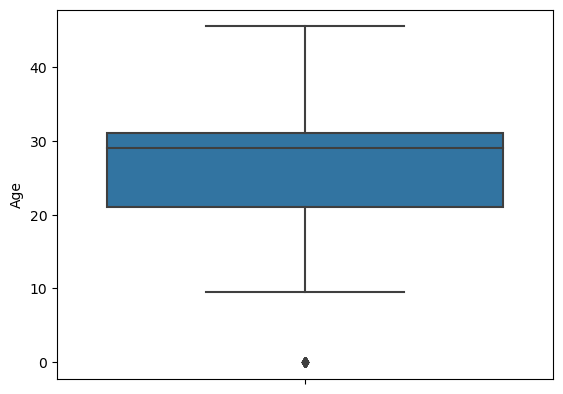

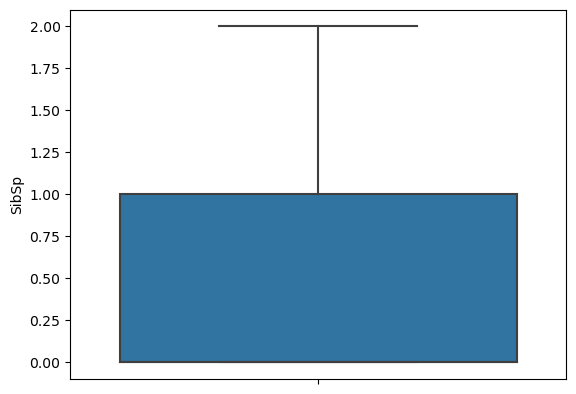

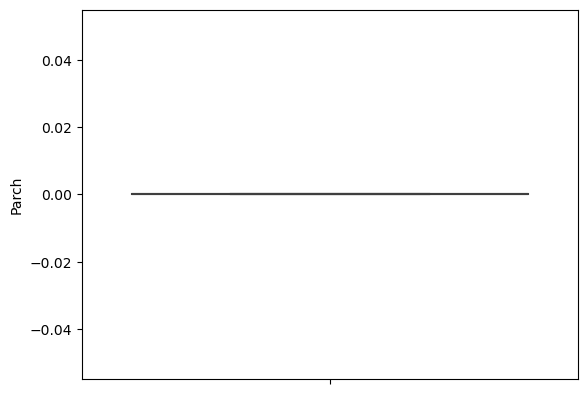

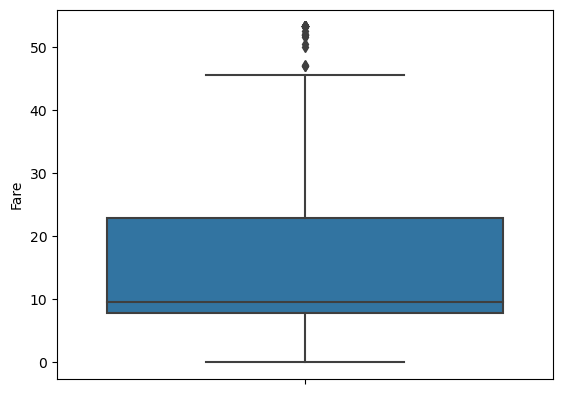

In [67]:
for i in test.select_dtypes(include = ['int','float']):
    sns.boxplot(data = test, y = i)
    plt.show()

In [52]:
# Dealing with Outliers 
Outlier = ['Age','SibSp', 'Parch', 'Fare']



In [68]:
for i in Outlier:
    q1 = test[i].quantile(0.25)
    q3 = test[i].quantile(0.75)
    
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    # Replace outliers with 0
    test[i] = test[i].apply(lambda x: 0 if (x < lower_limit or x > upper_limit) else x)

    

Now Train data

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking and cleaning null values in data

In [73]:
train.shape

(891, 11)

In [71]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [72]:
train.drop('Cabin', axis = 1, inplace = True)

Cheaking outliers

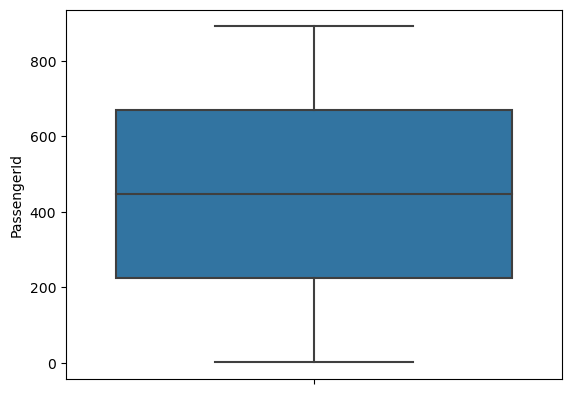

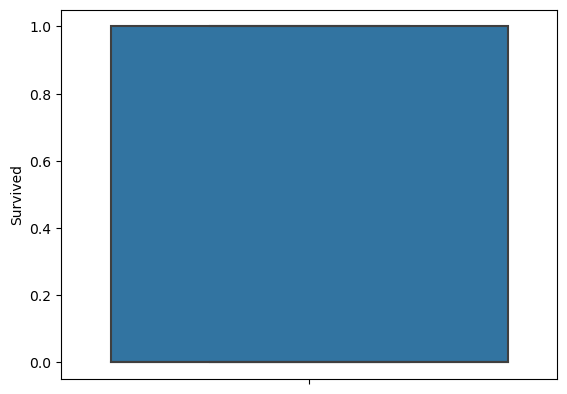

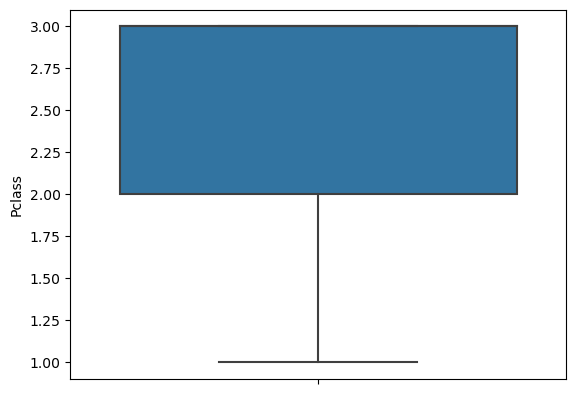

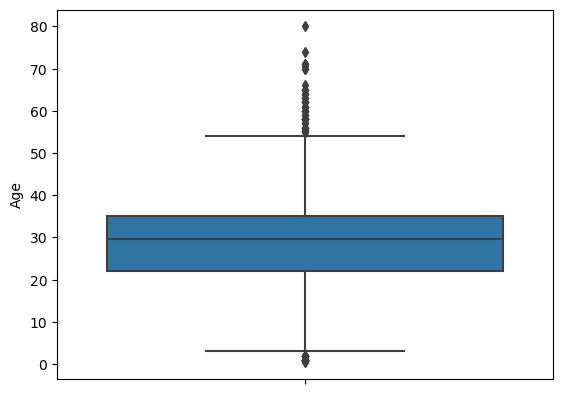

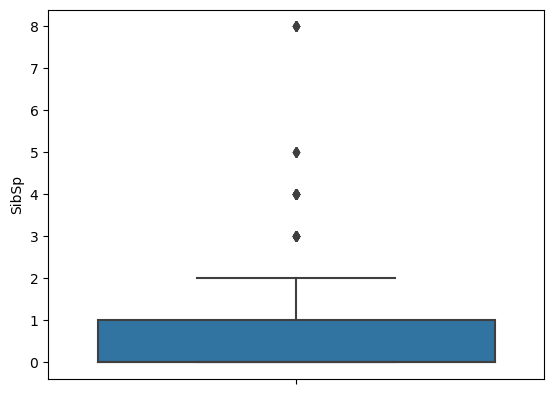

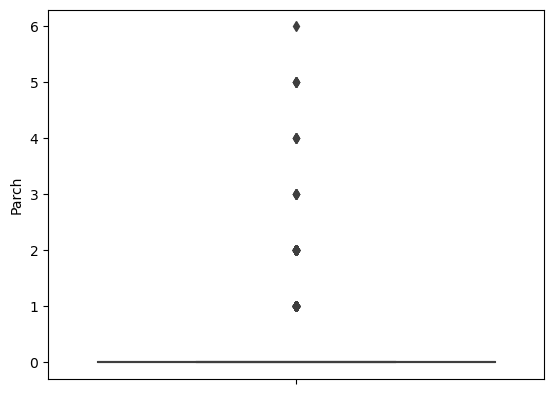

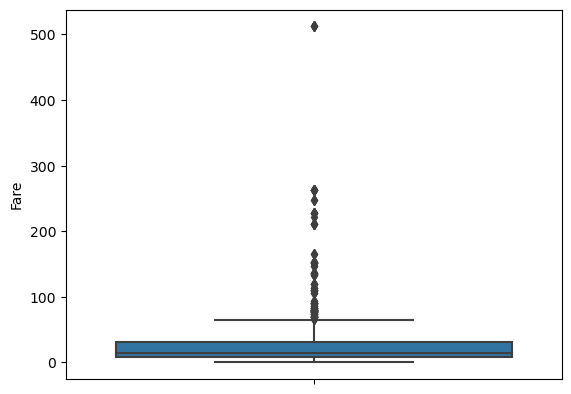

In [74]:
for i in train.select_dtypes(include = ['int','float']):
    sns.boxplot(data = train, y = i)
    plt.show()

In [75]:
# Dealing with Outliers 
Outlier = ['Age','SibSp', 'Parch', 'Fare']



In [80]:
for i in Outlier:
    q1 = train[i].quantile(0.25)
    q3 = train[i].quantile(0.75)
    
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    # Replace outliers with 0
    train[i] = train[i].apply(lambda x:x if (x < lower_limit or x > upper_limit) else 0)

    

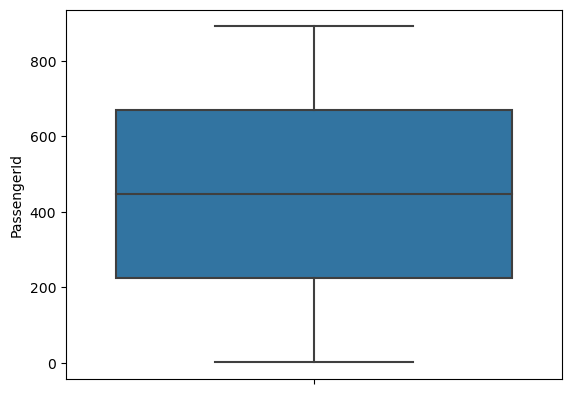

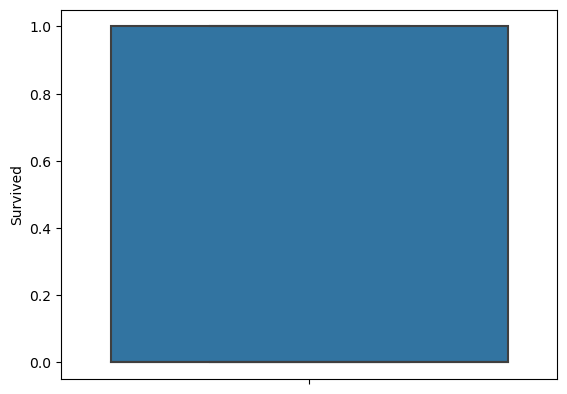

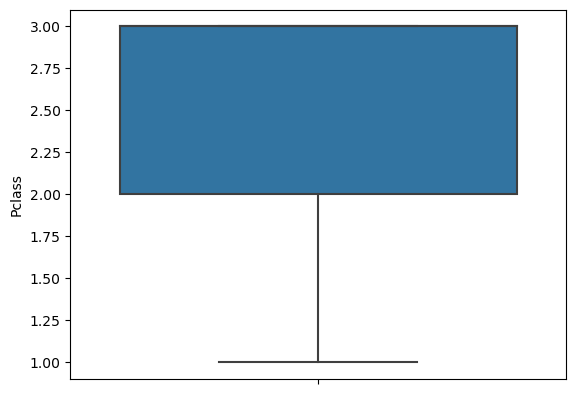

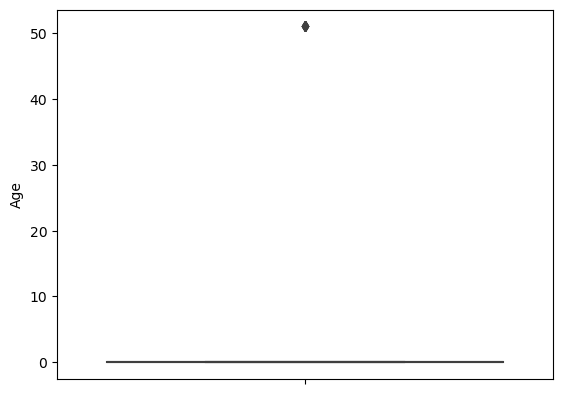

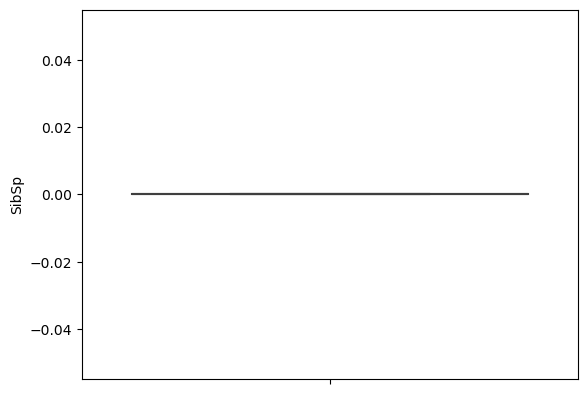

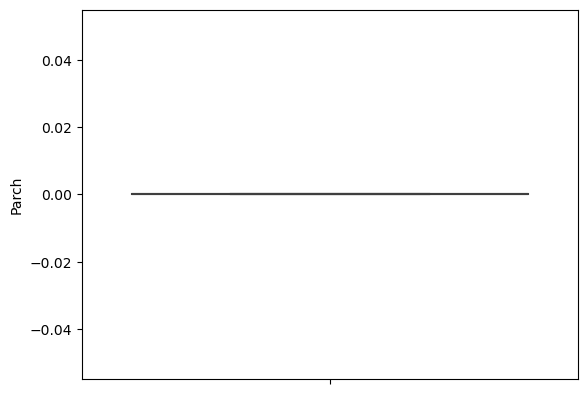

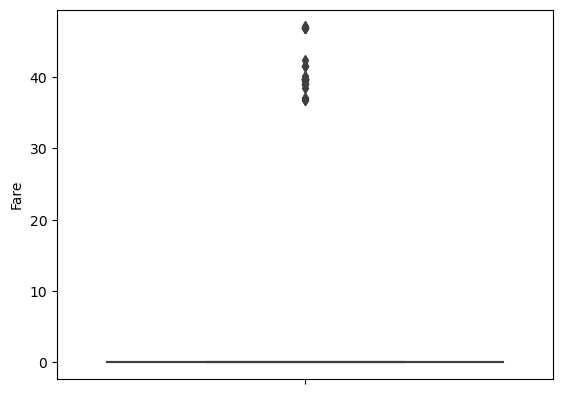

In [81]:
for i in train.select_dtypes(include = ['int','float']):
    sns.boxplot(data = train, y = i)
    plt.show()

Calculate summary statistics

In [83]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Age,891.0,0.400673,4.505173,0.0,0.0,0.0,0.0,51.0
SibSp,891.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Parch,891.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Fare,891.0,1.385517,7.453616,0.0,0.0,0.0,0.0,47.1


In [84]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.0,996.25000,1100.50,1204.750000,1309.0
Pclass,418.0,2.265550,0.841838,1.0,1.00000,3.00,3.000000,3.0
Age,418.0,26.457997,11.669176,0.0,21.00000,29.00,31.000000,45.5
SibSp,418.0,0.330144,0.537425,0.0,0.00000,0.00,1.000000,2.0
Parch,418.0,0.000000,0.000000,0.0,0.00000,0.00,0.000000,0.0
Fare,418.0,11.906917,10.166987,0.0,7.22605,8.05,15.747925,45.5
